# NoSQL-Based Real-Time Social Media Engagement & Influence Analysis

## 🎯 Project Motive

This project simulates a real-world social media platform using a NoSQL document-oriented dataset (MongoDB-style JSON). Extracting meaningful insights about:

- `User behavior (e.g., who posts, who engages, who follows)`

- `Content trends (e.g., hashtags, locations, post time)`

- `Influence and network structure (e.g., mutual follows, centrality)`

- `Emotional tone (e.g., comment sentiment, engagement impact)`


## ❓ Analytical Questions to Explore

- 👤 **User Behavior**

  - Who are the top 10 most followed users?

  - Which users post the most content?

  - Who likes and comments the most?

  - What is the average follower-to-following ratio?

  - How many users are inactive (no posts or comments)?

- 💬 **Engagement & Virality**

  - What are the most liked and commented posts?

  - Which posts are the most viral (likes + 2×comments)?

  - Which users have the highest average engagement per post?

  - What is the distribution of likes and comments across all posts?

- 🏷️ **Hashtag & Location Insights**

  - What are the top 10 most used hashtags?

  - Which hashtags generate the highest engagement?

  - What are the most active locations for posting?

- ⏰ **Temporal Patterns**

  - What times of day and days of week have the most posts?

  - Are there peak hours for high engagement?

  - Does sentiment or engagement change based on post time?

- 📡 **Network Structure & Influence**

  - What does the user-follow network look like?

  - Who are the most influential users (followers + engagement)?

  - How many users follow each other back (mutual follows)?

  - Are users with more followers more active or more liked?

- 🧠 **Sentiment & NLP**

  - What is the overall sentiment of user comments?

  - Which posts receive the most positive or negative sentiment?

  - Are more emotional comments linked to higher engagement?

  - Which users post mostly negative or mostly positive content?



## 📦 Data Loading and Structure

### 🔹 Importing Required Libraries

In [110]:
import pandas as pd
import networkx as nx
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 🔹 Loading JSON Files

In [111]:
users = pd.read_json("C:/Github Repository/Real-Time-Social-Media-Feed-with-NoSQL/data/users.json")
posts = pd.read_json("C:/Github Repository/Real-Time-Social-Media-Feed-with-NoSQL/data/posts.json")

### 🔹 Previewing the Datasets

In [112]:
users.head()

,id,username,email,bio,profile_pic,followers,following,created_at
0,user_1,Urban91,Cory_Schoen8@gmail.com,Minimalist lifestyle advocate.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_12, user_42, user_71, user_72, user_100,...","[user_803, user_624, user_883, user_253, user_...",2025-01-20 06:33:34.364000+00:00
1,user_2,Thomas_Blick,Jasper.Senger@hotmail.com,Building dreams in code and pixels.,https://avatars.githubusercontent.com/u/31432577,"[user_79, user_121, user_153, user_165, user_2...","[user_281, user_9, user_457, user_623, user_83...",2025-02-28 02:29:52.993000+00:00
2,user_3,Enrico53,Cydney.Crist52@gmail.com,Making memories around the world.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_50, user_76, user_131, user_168, user_18...","[user_872, user_629, user_743, user_986, user_...",2024-07-01 17:31:28.728000+00:00
3,user_4,Brent_Hermann33,Vivian.Skiles@gmail.com,Travel. Capture. Repeat.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_49, user_152, user_181, user_231, user_2...","[user_255, user_970, user_48, user_614, user_4...",2024-08-02 05:28:50.654000+00:00
4,user_5,Helena_Stroman,Luz_Durgan@yahoo.com,Just a human trying to do better.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_43, user_68, user_129, user_137, user_16...","[user_327, user_145, user_755, user_467, user_...",2024-11-11 15:17:49.121000+00:00


In [113]:
posts.head()

,id,author_id,text,media_url,hashtags,location,likes,comments,timestamp
0,post_1,user_87,Nothing like fresh air and good company.,https://loremflickr.com/2812/1773?lock=8797535...,"[succedo, accendo]",Toyworth,"[user_786, user_994, user_686, user_601, user_...","[{'user_id': 'user_217', 'text': 'Too pretty t...",2025-05-07 14:48:04.341000+00:00
1,post_2,user_116,Nothing like fresh air and good company.,https://loremflickr.com/1604/1497?lock=1094063...,"[stultus, asperiores]",East Barrettworth,[user_896],"[{'user_id': 'user_119', 'text': 'Your aesthet...",2025-05-07 21:43:21.441000+00:00
2,post_3,user_524,Sunsets like these remind me to slow down 🌅,https://loremflickr.com/270/44?lock=8938873091...,"[contra, trepide, considero]",Auburn,"[user_893, user_527, user_391, user_918, user_...","[{'user_id': 'user_150', 'text': 'This just ma...",2025-05-07 22:38:02.406000+00:00
3,post_4,user_980,New recipe turned out better than expected 👨‍🍳🍝,https://picsum.photos/seed/sdoQlp2wg/2864/1617,[canto],Lake Jeanne,"[user_400, user_959, user_593, user_422, user_...","[{'user_id': 'user_541', 'text': 'Take me ther...",2025-05-07 12:57:12.284000+00:00
4,post_5,user_761,Simple moments are the most special.,https://picsum.photos/seed/oCcp4/2210/2847,[nemo],Stokesmouth,"[user_199, user_642, user_184, user_593, user_...","[{'user_id': 'user_17', 'text': 'Pinned to my ...",2025-05-07 12:23:51.352000+00:00


### 🔹 Understanding the Schema

In [114]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           1000 non-null   object             
 1   username     1000 non-null   object             
 2   email        1000 non-null   object             
 3   bio          1000 non-null   object             
 4   profile_pic  1000 non-null   object             
 5   followers    1000 non-null   object             
 6   following    1000 non-null   object             
 7   created_at   1000 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 62.6+ KB


In [115]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id         3000 non-null   object             
 1   author_id  3000 non-null   object             
 2   text       3000 non-null   object             
 3   media_url  3000 non-null   object             
 4   hashtags   3000 non-null   object             
 5   location   3000 non-null   object             
 6   likes      3000 non-null   object             
 7   comments   3000 non-null   object             
 8   timestamp  3000 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 211.1+ KB


### 🔹 Inspect Nested Fields

In [116]:
# Displaying structure of key nested fields
posts[["likes", "comments", "hashtags"]].head(3)


,likes,comments,hashtags
0,"[user_786, user_994, user_686, user_601, user_...","[{'user_id': 'user_217', 'text': 'Too pretty t...","[succedo, accendo]"
1,[user_896],"[{'user_id': 'user_119', 'text': 'Your aesthet...","[stultus, asperiores]"
2,"[user_893, user_527, user_391, user_918, user_...","[{'user_id': 'user_150', 'text': 'This just ma...","[contra, trepide, considero]"


In [117]:
# Checking a sample comment object
posts["comments"].iloc[0]

[{'user_id': 'user_217',
  'text': 'Too pretty to be real.',
  'timestamp': '2025-05-07T05:14:49.963Z'},
 {'user_id': 'user_606',
  'text': 'You’ve got the golden touch!',
  'timestamp': '2025-05-07T06:27:43.890Z'},
 {'user_id': 'user_254',
  'text': "Can't stop looking at this!",
  'timestamp': '2025-05-07T19:31:27.908Z'},
 {'user_id': 'user_977',
  'text': 'So peaceful ❤️',
  'timestamp': '2025-05-08T03:17:24.961Z'},
 {'user_id': 'user_587',
  'text': 'This is pure art 🔥',
  'timestamp': '2025-05-07T23:22:58.241Z'},
 {'user_id': 'user_614',
  'text': 'Your content keeps getting better!',
  'timestamp': '2025-05-07T05:56:18.667Z'},
 {'user_id': 'user_334',
  'text': 'Incredible shot!',
  'timestamp': '2025-05-07T20:49:45.483Z'}]

## 📊 Exploratory Data Analysis (EDA) & Analytical Questions

🎯 **Objective**:

In this section, we will:

- `Explore user activity, engagement, and content performance`

- `Understand patterns in likes, comments, followers, and hashtags`

- `Begin answering the core questions defined for the project`



### 🔍 **Q1.** Who are the top 10 most followed users?

In [118]:
users["followers_count"] = users["followers"].apply(len)
top_followed = users.sort_values(by="followers_count", ascending=False).head(10)

top_followed[["username", "followers_count"]]

,username,followers_count
256,Travon62,31
369,Georgiana.Predovic66,31
395,Kelvin75,29
768,Noah_Lowe,29
314,Jermain.Bailey93,29
333,Casimer.Leuschke34,28
932,Sally.Schneider,28
876,Zachery.Miller15,28
458,Fanny10,28
732,Geoffrey_Predovic72,28


#### Visualizing

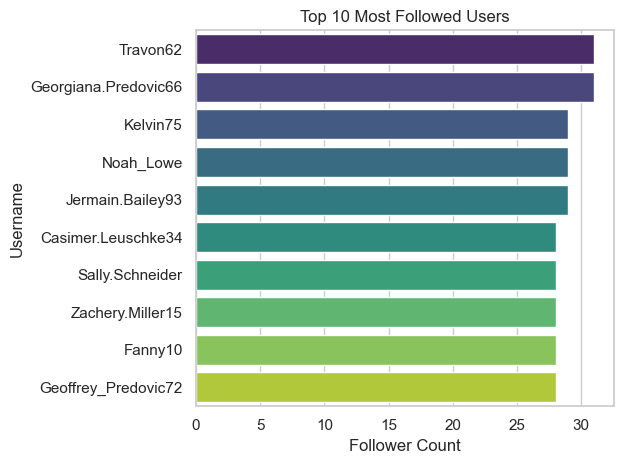

In [119]:
sns.barplot(
    data=top_followed,
    x="followers_count",
    y="username",
    hue="username",
    dodge=False,
    palette="viridis",
    legend=False
)

plt.title("Top 10 Most Followed Users")
plt.xlabel("Follower Count")
plt.ylabel("Username")
plt.tight_layout()
plt.show()


### 🔍 **Q2.** Which users posted the most content?

In [120]:
post_counts = posts["author_id"].value_counts().head(10)

top_posters = post_counts.reset_index()
top_posters.columns = ["user_id", "post_count"]

top_posters = top_posters.merge(users[["id", "username"]], left_on="user_id", right_on="id")
top_posters[["username", "post_count"]]

,username,post_count
0,Dale38,10
1,Lilla88,10
2,Domenica61,9
3,Rolando_Jast,9
4,Kasandra43,9
5,Marshall50,9
6,Dominique64,9
7,Ramona64,9
8,Mavis59,9
9,Dixie42,9


#### Visualizing

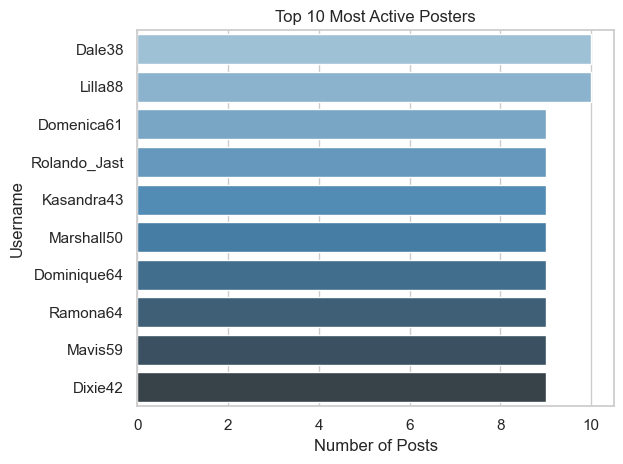

In [121]:
sns.barplot(
    data=top_posters,
    x="post_count",
    y="username",
    hue="username",
    dodge=False,
    palette="Blues_d",
    legend=False
)

plt.title("Top 10 Most Active Posters")
plt.xlabel("Number of Posts", fontsize=12)
plt.ylabel("Username", fontsize=12)
plt.tight_layout()
plt.show()

### 🔍 **Q3.** What are the top 10 most used hashtags?

In [122]:
posts_exploded = posts.explode("hashtags")

top_hashtags = posts_exploded["hashtags"].value_counts().head(10)

top_hashtags

hashtags
amor            19
consuasor       15
videlicet       14
aetas           14
ver             14
cruciamentum    13
ascit           13
confugo         13
sui             13
crinis          13
Name: count, dtype: int64

#### Visualizing

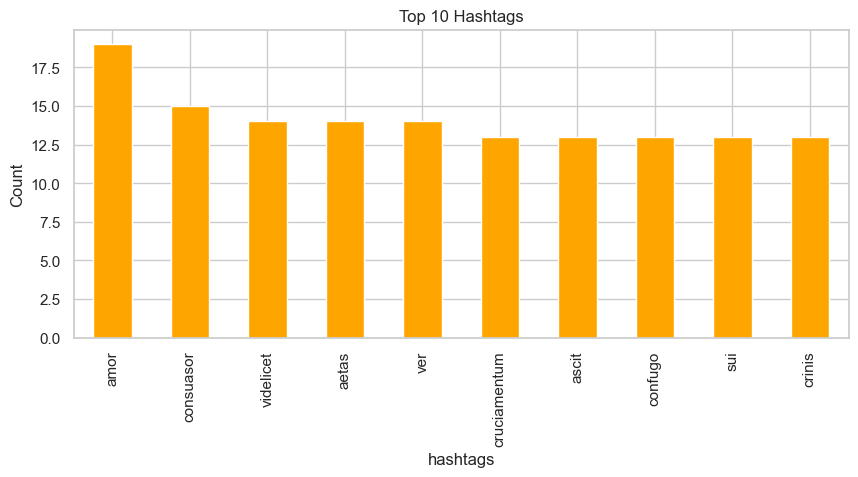

In [123]:
top_hashtags.plot(kind="bar", color="orange", figsize=(10, 4), title="Top 10 Hashtags")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


### 🔍 **Q4.** What is the average number of likes and comments per post?

In [124]:
posts["num_likes"] = posts["likes"].apply(len)
posts["num_comments"] = posts["comments"].apply(len)

avg_likes = posts["num_likes"].mean()
avg_comments = posts["num_comments"].mean()

print(f"Average Likes per Post: {avg_likes:.2f}")
print(f"Average Comments per Post: {avg_comments:.2f}")




Average Likes per Post: 10.08
Average Comments per Post: 4.93


#### Visualizing

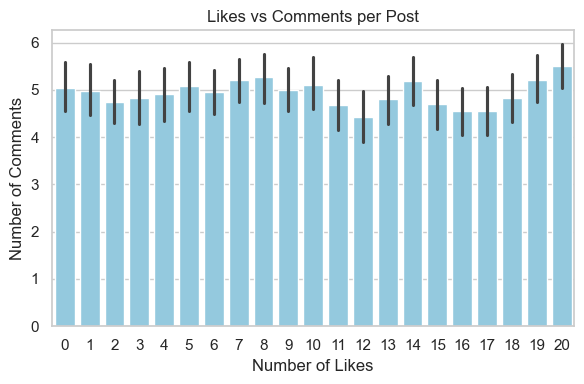

In [125]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=posts,
    x="num_likes",
    y="num_comments",
    color="skyblue"
)
plt.title("Likes vs Comments per Post")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

### 🔍 **Q5.** Which posts are the most viral (likes + 2×comments)?

In [126]:
posts["engagement_score"] = posts["num_likes"] + 2 * posts["num_comments"]

viral_posts = posts.sort_values(by="engagement_score", ascending=False).head(5)
viral_posts[["author_id", "text", "num_likes", "num_comments", "engagement_score"]]


,author_id,text,num_likes,num_comments,engagement_score
2555,user_500,"Coffee in one hand, confidence in the other ☕💪",20,10,40
1863,user_244,Here’s to chasing dreams and catching sunsets 🌞,20,10,40
571,user_356,What a peaceful morning walk today 🌤️,20,10,40
1998,user_692,Rainy day reads and cozy vibes 📚☔,20,10,40
2537,user_542,Craving days like this again 💫,20,10,40


#### Visualizing

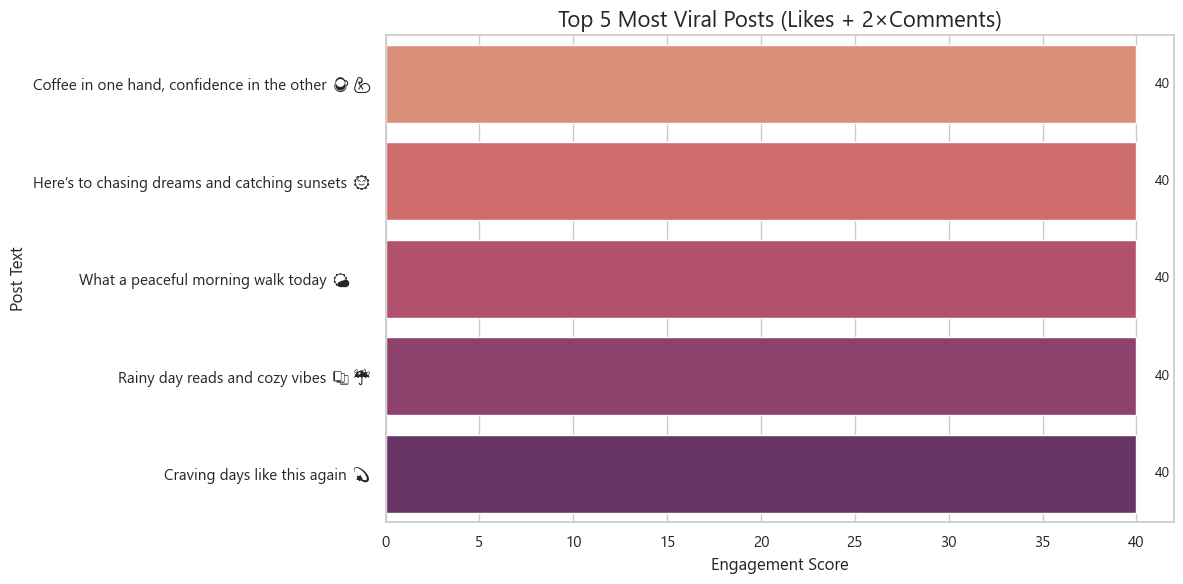

In [127]:
# Setting emoji-compatible font (Windows)
plt.rcParams['font.family'] = 'Segoe UI Emoji'

data = viral_posts.sort_values("engagement_score", ascending=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=data,
    x="engagement_score",
    y="text",
    hue="text",
    dodge=False,
    palette="flare",
    legend=False
)

for i, (score, text) in enumerate(zip(data["engagement_score"], data["text"])):
    ax.text(score + 1, i, f"{score}", va='center', fontsize=10, fontweight='bold')

plt.title("Top 5 Most Viral Posts (Likes + 2×Comments)", fontsize=16, fontweight='bold')
plt.xlabel("Engagement Score")
plt.ylabel("Post Text")
plt.tight_layout()
plt.show()


### 🔍 **Q6.** What times of day are users most active?



In [128]:
posts["timestamp"] = pd.to_datetime(posts["timestamp"])
posts["post_hour"] = posts["timestamp"].dt.hour

hourly_post_counts = posts["post_hour"].value_counts().sort_index()

hourly_post_counts.head()

post_hour
0    132
1    121
2    134
3    129
4    122
Name: count, dtype: int64

#### Visualizing

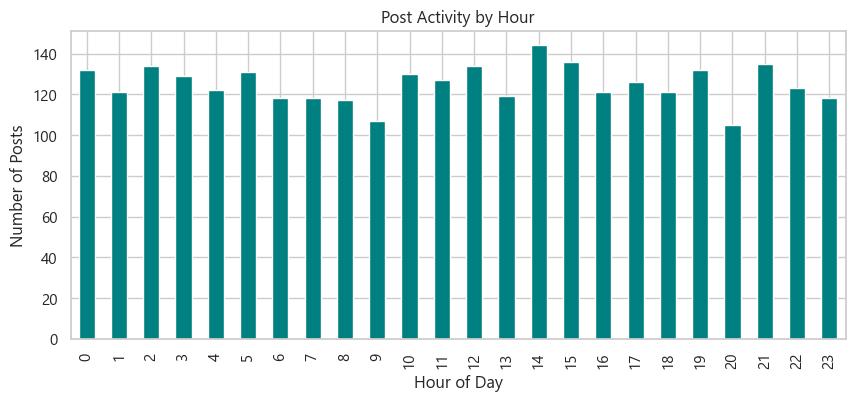

In [129]:
hourly_post_counts.plot(kind="bar", figsize=(10, 4), color="teal")
plt.title("Post Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Posts")
plt.show()

### 🔍 **Q7.** What days of the week see the most posting?

In [130]:
posts["post_day"] = posts["timestamp"].dt.day_name()

daily_post_counts = posts["post_day"].value_counts().sort_values(ascending=False)

daily_post_counts.head()

post_day
Wednesday    2556
Thursday      444
Name: count, dtype: int64

#### Visualizing

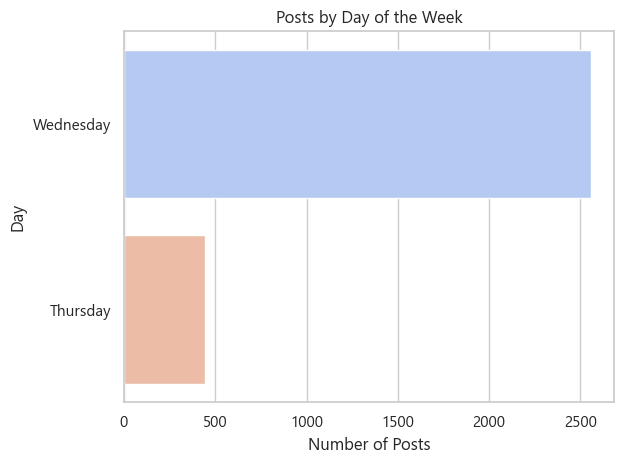

In [131]:
df = pd.DataFrame({"day": daily_post_counts.index, "post_count": daily_post_counts.values})

sns.barplot(data=df, x="post_count", y="day", hue="day", dodge=False, palette="coolwarm", legend=False)
plt.title("Posts by Day of the Week")
plt.xlabel("Number of Posts")
plt.ylabel("Day")
plt.tight_layout()
plt.show()

### 🔍 **Q8.** Which locations generate the most posts?

In [132]:
top_locations = posts["location"].value_counts().head(10)

top_locations


location
Pueblo           5
Pharr            4
The Hammocks     4
Skokie           4
University       3
Oakland Park     3
El Cajon         3
Duluth           3
Baumbachville    3
Kirkland         3
Name: count, dtype: int64

#### Visualizing

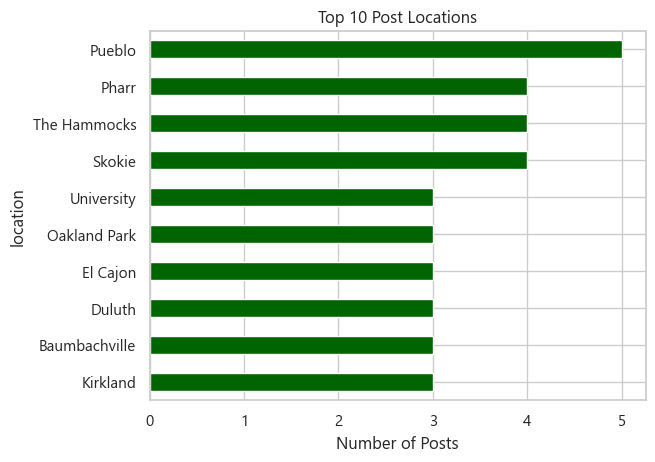

In [133]:
top_locations.plot(kind="barh", title="Top 10 Post Locations", color="darkgreen")
plt.xlabel("Number of Posts")
plt.gca().invert_yaxis()
plt.show()


### 🔍 **Q9.** Who are the top influencers? (followers + engagement)

In [134]:
engagement_by_user = posts.groupby("author_id")[["num_likes", "num_comments", "engagement_score"]].sum().reset_index()

merged = users.merge(engagement_by_user, left_on="id", right_on="author_id", how="left")
merged.fillna(0, inplace=True)
merged["influencer_score"] = merged["followers_count"] + merged["engagement_score"]

top_influencers = merged.sort_values(by="influencer_score", ascending=False)
top_influencers[["username", "followers_count", "engagement_score", "influencer_score"]].head(10)



,username,followers_count,engagement_score,influencer_score
84,Domenica61,15,242.0,257.0
423,Ramona64,16,236.0,252.0
10,Lilla88,20,223.0,243.0
941,Mavis59,26,216.0,242.0
397,Kasandra43,11,221.0,232.0
936,Marshall50,10,214.0,224.0
477,Dixie42,12,210.0,222.0
663,Dominique64,11,190.0,201.0
57,Virgie.Monahan57,21,179.0,200.0
892,Nova87,23,173.0,196.0


#### Visualizing

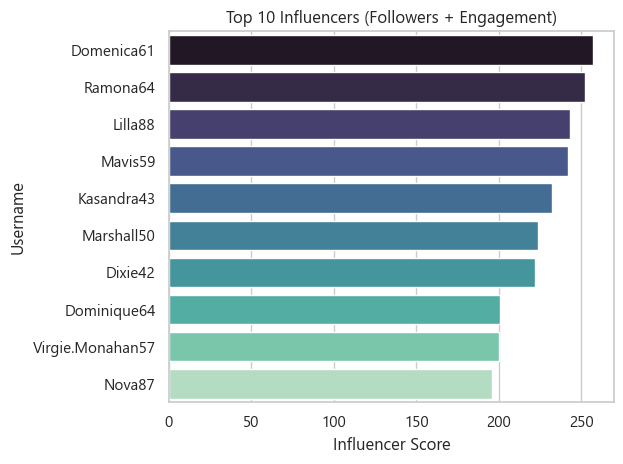

In [135]:
sns.barplot(
    data=top_influencers.head(10),
    x="influencer_score",
    y="username",
    hue="username",
    dodge=False,
    palette="mako",
    legend=False
)
plt.title("Top 10 Influencers (Followers + Engagement)")
plt.xlabel("Influencer Score")
plt.ylabel("Username")
plt.tight_layout()
plt.show()


### 🔍 **Q10.** Which hashtags generate the most engagement?

In [136]:
hashtags_df = posts.explode("hashtags")

hashtag_engagement = hashtags_df.groupby("hashtags")[["num_likes", "num_comments", "engagement_score"]].mean()

top_engaging_hashtags = hashtag_engagement.sort_values(by="engagement_score", ascending=False).head(10)
top_engaging_hashtags

,num_likes,num_comments,engagement_score
hashtags,,,
veritas,20.000000,9.000000,38.000000
cicuta,19.000000,8.000000,35.000000
autus,20.000000,6.000000,32.000000
adiuvo,17.666667,7.166667,32.000000
curvo,15.714286,7.857143,31.428571
vulticulus,15.200000,8.000000,31.200000
voveo,16.500000,7.000000,30.500000
suadeo,14.857143,7.714286,30.285714
tantum,16.000000,7.000000,30.000000


#### Visualizing

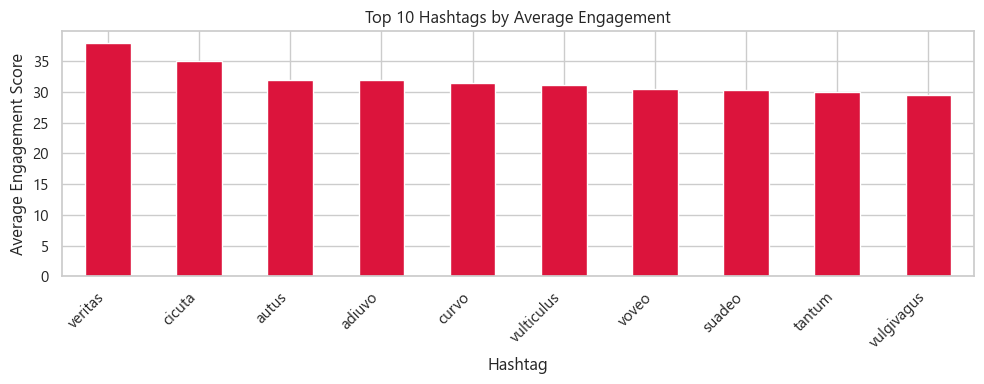

In [137]:
top_engaging_hashtags["engagement_score"].plot(
    kind="bar",
    color="crimson",
    figsize=(10, 4),
    title="Top 10 Hashtags by Average Engagement"
)
plt.ylabel("Average Engagement Score")
plt.xlabel("Hashtag")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 🔍 **Q11.** What is the average engagement based on time of day?

In [138]:
hourly_engagement = posts.groupby("post_hour")[["engagement_score"]].mean()

hourly_engagement = hourly_engagement.reset_index()

hourly_engagement

,post_hour,engagement_score
0,0,19.348485
1,1,18.752066
2,2,19.447761
3,3,19.131783
4,4,19.770492
5,5,18.244275
6,6,20.525424
7,7,21.703390
8,8,20.196581
9,9,19.822430


#### Visualizing

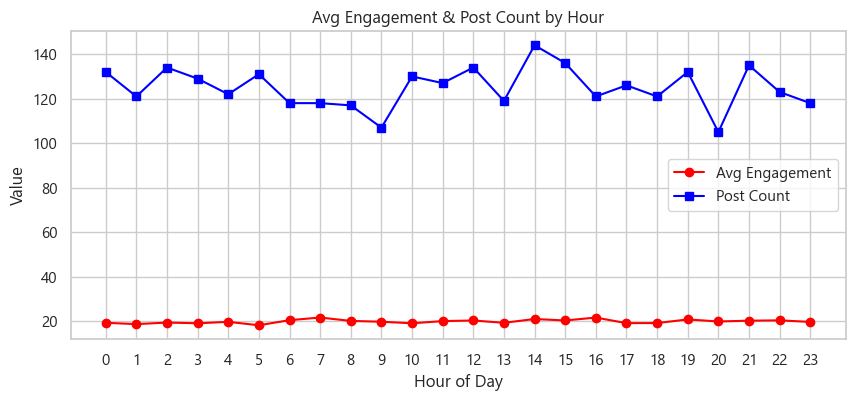

In [139]:
plt.figure(figsize=(10, 4))
plt.plot(hourly_engagement["post_hour"], hourly_engagement["engagement_score"], marker="o", color="red", label="Avg Engagement")
plt.plot(hourly_post_counts.index, hourly_post_counts.values, marker="s", color="blue", label="Post Count")
plt.title("Avg Engagement & Post Count by Hour")
plt.ylabel("Value")
plt.xlabel("Hour of Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

### 🔍 **Q12.** What is the average sentiment of comments per post?

In [140]:
from textblob import TextBlob

comments_list = []

for _, row in posts.iterrows():
    for comment in row["comments"]:
        comments_list.append({
            "post_id": row["id"],
            "user_id": comment["user_id"],
            "text": comment["text"]
        })

comments_df = pd.DataFrame(comments_list)

comments_df["sentiment"] = comments_df["text"].apply(lambda t: TextBlob(t).sentiment.polarity)

comments_df["sentiment"]


0        0.225000
1        0.375000
2        0.000000
3        0.250000
4        0.214286
           ...   
14791    0.000000
14792    0.000000
14793    0.000000
14794    0.000000
14795    0.875000
Name: sentiment, Length: 14796, dtype: float64

#### Visualizing

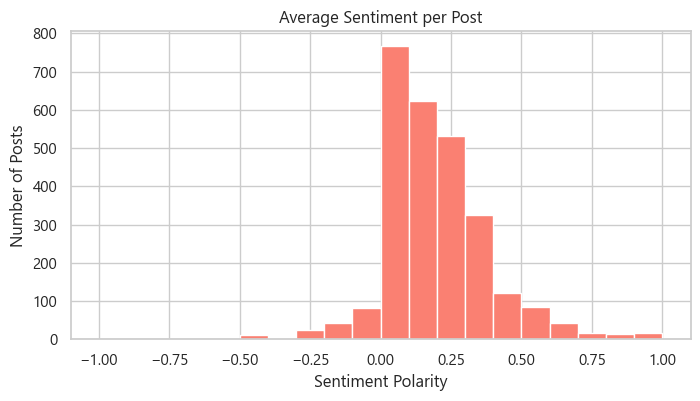

In [141]:
avg_sentiment_per_post = comments_df.groupby("post_id")["sentiment"].mean()
avg_sentiment_per_post.hist(bins=20, figsize=(8, 4), color='salmon')
plt.title("Average Sentiment per Post")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Posts")
plt.show()

### 🔍 **Q13.** Do mutual followers tend to post more?

In [142]:
def count_mutual_follows(row):
    followers = set(row['followers'])
    following = set(row['following'])
    return len(followers & following)

users["mutual_follows"] = users.apply(count_mutual_follows, axis=1)

user_post_counts = posts["author_id"].value_counts().reset_index()
user_post_counts.columns = ["id", "post_count"]

merged_users = users.merge(user_post_counts, on="id", how="left").fillna(0)

merged_users.head(3)

,id,username,email,bio,profile_pic,followers,following,created_at,followers_count,mutual_follows,post_count
0,user_1,Urban91,Cory_Schoen8@gmail.com,Minimalist lifestyle advocate.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_12, user_42, user_71, user_72, user_100,...","[user_803, user_624, user_883, user_253, user_...",2025-01-20 06:33:34.364000+00:00,16,0,2.0
1,user_2,Thomas_Blick,Jasper.Senger@hotmail.com,Building dreams in code and pixels.,https://avatars.githubusercontent.com/u/31432577,"[user_79, user_121, user_153, user_165, user_2...","[user_281, user_9, user_457, user_623, user_83...",2025-02-28 02:29:52.993000+00:00,21,1,4.0
2,user_3,Enrico53,Cydney.Crist52@gmail.com,Making memories around the world.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_50, user_76, user_131, user_168, user_18...","[user_872, user_629, user_743, user_986, user_...",2024-07-01 17:31:28.728000+00:00,25,0,5.0


#### Visualizing

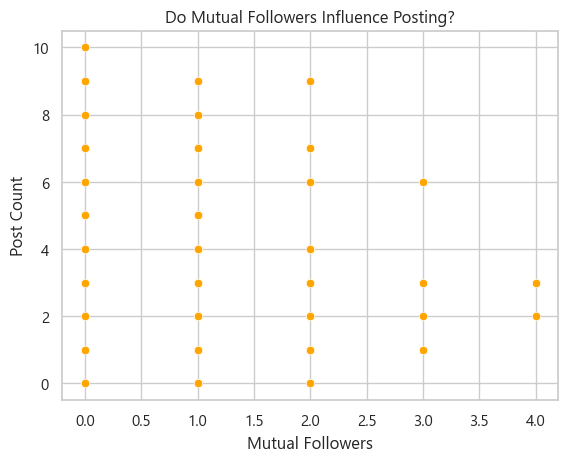

In [143]:
sns.scatterplot(data=merged_users, x="mutual_follows", y="post_count", color="orange")
plt.title("Do Mutual Followers Influence Posting?")
plt.xlabel("Mutual Followers")
plt.ylabel("Post Count")
plt.grid(True)
plt.show()

### 🔍 **Q14.** What are the most used hashtags per day of the week?

In [144]:
posts["post_day"] = posts["timestamp"].dt.day_name()
hashtag_by_day = posts.explode("hashtags").groupby(["post_day", "hashtags"]).size().reset_index(name="count")

top_per_day = hashtag_by_day.groupby("post_day").apply(lambda df: df.nlargest(1, "count")).reset_index(drop=True)
top_per_day

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_10064\582354447.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_per_day = hashtag_by_day.groupby("post_day").apply(lambda df: df.nlargest(1, "count")).reset_index(drop=True)


,post_day,hashtags,count
0,Thursday,soluta,6
1,Wednesday,amor,16


#### Visualizing

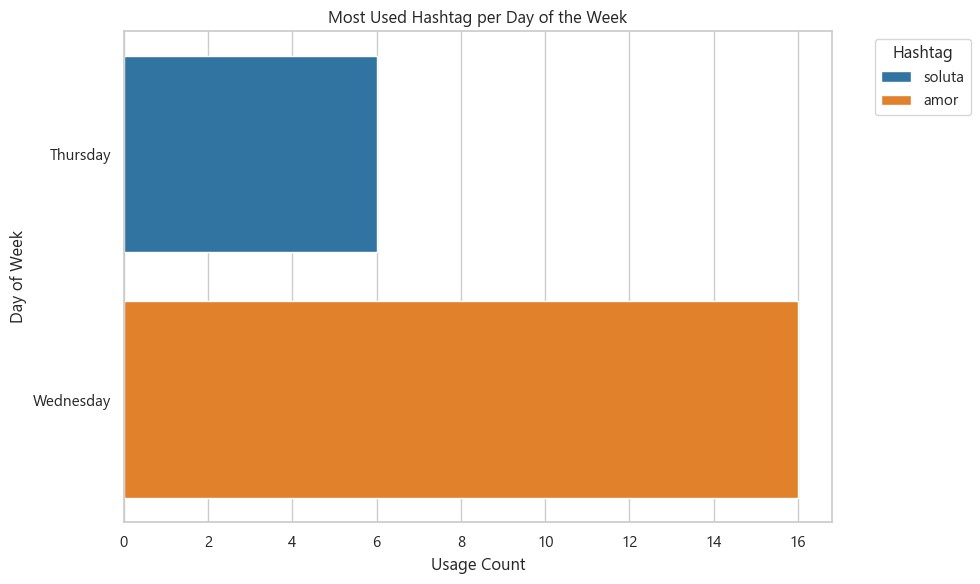

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_per_day,
    x="count",
    y="post_day",
    hue="hashtags",
    dodge=False,
    palette="tab10"
)
plt.title("Most Used Hashtag per Day of the Week")
plt.xlabel("Usage Count")
plt.ylabel("Day of Week")
plt.legend(title="Hashtag", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### 🔍 **Q15.** How many users are inactive (no posts or comments)?

In [146]:
posted_users = set(posts["author_id"])
commented_users = set(comments_df["user_id"])
active_users = posted_users.union(commented_users)
all_users = set(users["id"])

inactive_users = all_users - active_users
print(f"Inactive users: {len(inactive_users)} out of {len(all_users)}")


Inactive users: 0 out of 1000


### 🔍 **Q16.** Which users receive the most average engagement per post?

In [147]:
user_avg_engagement = posts.groupby("author_id")["engagement_score"].mean().reset_index()
user_avg_engagement.columns = ["id", "avg_engagement"]

top_avg_engagement = user_avg_engagement.merge(users[["id", "username"]], on="id").sort_values(by="avg_engagement", ascending=False)

top_avg_engagement[["username", "avg_engagement"]].head(10)

,username,avg_engagement
461,Uriel_Kerluke63,40.0
21,Tanya_Gutkowski69,39.0
551,Estel_Ankunding,38.0
518,Virgil43,38.0
455,Daren.Bayer40,38.0
902,Claudia15,38.0
315,Carli_OHara,38.0
398,Michelle.Hane,38.0
638,Mekhi.Feest,36.0
731,Tristian35,36.0


#### Visualizing

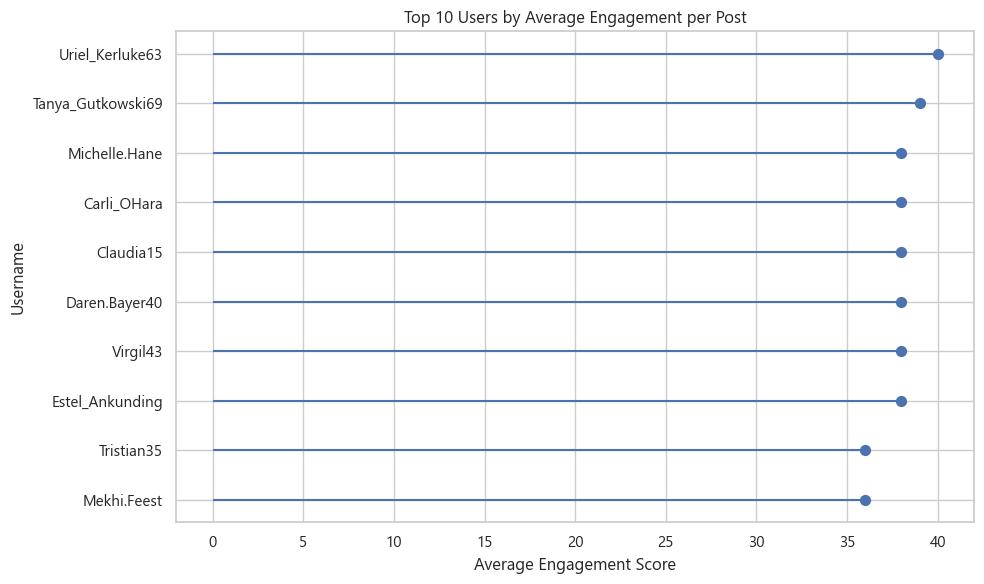

In [148]:
data = top_avg_engagement.head(10).sort_values("avg_engagement")
fig, ax = plt.subplots(figsize=(10, 6))

ax.hlines(y=data["username"], xmin=0, xmax=data["avg_engagement"])
ax.scatter(data["avg_engagement"], data["username"], s=50)

ax.set_title("Top 10 Users by Average Engagement per Post")
ax.set_xlabel("Average Engagement Score")
ax.set_ylabel("Username")

plt.tight_layout()
plt.show()


### 🔍 **Q17.** Are users with more followers also more active?

In [149]:
user_post_counts = posts["author_id"].value_counts().reset_index()
user_post_counts.columns = ["id", "post_count"]

merged_users = users.merge(user_post_counts, on="id", how="left").fillna(0)

merged_users.head()

,id,username,email,bio,profile_pic,followers,following,created_at,followers_count,mutual_follows,post_count
0,user_1,Urban91,Cory_Schoen8@gmail.com,Minimalist lifestyle advocate.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_12, user_42, user_71, user_72, user_100,...","[user_803, user_624, user_883, user_253, user_...",2025-01-20 06:33:34.364000+00:00,16,0,2.0
1,user_2,Thomas_Blick,Jasper.Senger@hotmail.com,Building dreams in code and pixels.,https://avatars.githubusercontent.com/u/31432577,"[user_79, user_121, user_153, user_165, user_2...","[user_281, user_9, user_457, user_623, user_83...",2025-02-28 02:29:52.993000+00:00,21,1,4.0
2,user_3,Enrico53,Cydney.Crist52@gmail.com,Making memories around the world.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_50, user_76, user_131, user_168, user_18...","[user_872, user_629, user_743, user_986, user_...",2024-07-01 17:31:28.728000+00:00,25,0,5.0
3,user_4,Brent_Hermann33,Vivian.Skiles@gmail.com,Travel. Capture. Repeat.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_49, user_152, user_181, user_231, user_2...","[user_255, user_970, user_48, user_614, user_4...",2024-08-02 05:28:50.654000+00:00,19,0,2.0
4,user_5,Helena_Stroman,Luz_Durgan@yahoo.com,Just a human trying to do better.,https://cdn.jsdelivr.net/gh/faker-js/assets-pe...,"[user_43, user_68, user_129, user_137, user_16...","[user_327, user_145, user_755, user_467, user_...",2024-11-11 15:17:49.121000+00:00,23,1,5.0


#### Visualizing

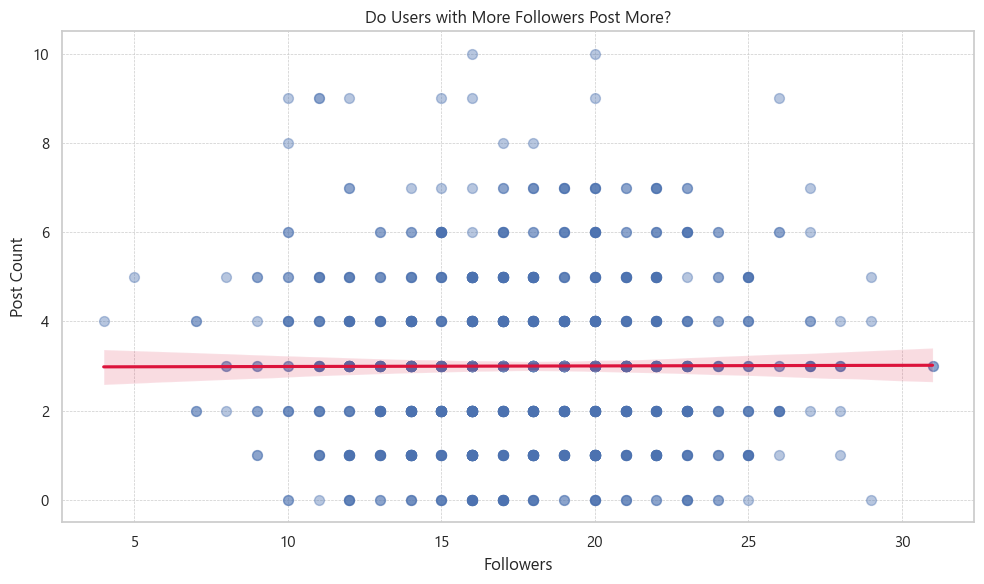

In [150]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_users,
    x="followers_count",
    y="post_count",
    scatter_kws={"alpha": 0.4, "s": 50}, 
    line_kws={"color": "crimson"}        
)
plt.title("Do Users with More Followers Post More?")
plt.xlabel("Followers")
plt.ylabel("Post Count")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

### 🔍 **Q18.** What is the most common length of a post text?

In [151]:
posts["text_length"] = posts["text"].astype(str).apply(len)

mean_length = posts["text_length"].mean()
median_length = posts["text_length"].median()


print("The mean of the most common length of a post text:",mean_length)
print("The median of the most common length of a post text:",median_length)

The mean of the most common length of a post text: 39.108
The median of the most common length of a post text: 39.0


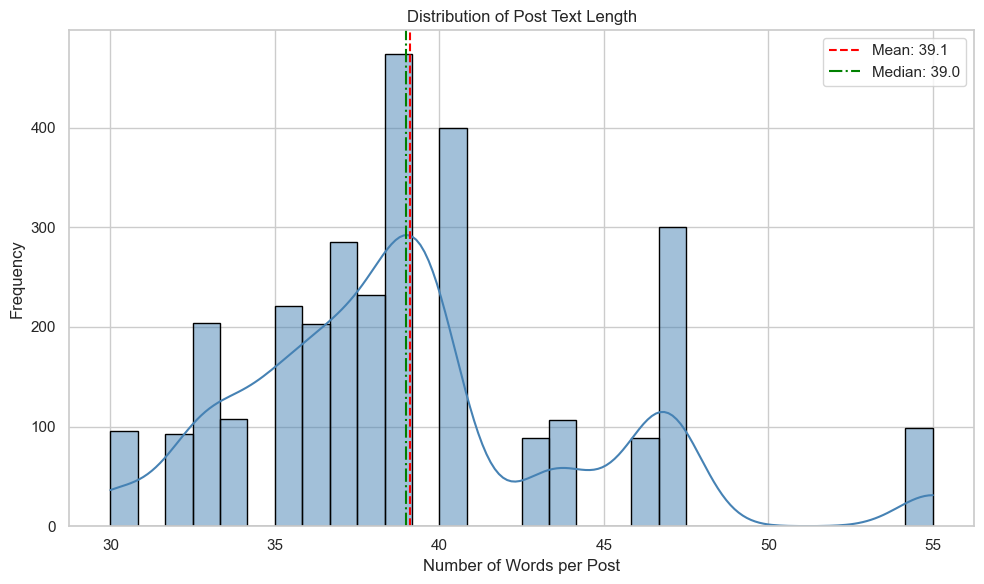

In [152]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(posts["text_length"], bins=30, kde=True, color="steelblue", edgecolor="black")

plt.axvline(mean_length, color="red", linestyle="--", label=f'Mean: {mean_length:.1f}')
plt.axvline(median_length, color="green", linestyle="-.", label=f'Median: {median_length:.1f}')

plt.title("Distribution of Post Text Length")
plt.xlabel("Number of Words per Post", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


### 🔍 **Q19.** What is the correlation between hashtags used and engagement?

In [153]:
# Safely create hashtag_count column
posts["hashtag_count"] = posts["hashtags"].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Dummy engagement score if not defined (customize as needed)
posts["engagement_score"] = posts["num_likes"] + posts["num_comments"]


posts[["hashtag_count", "engagement_score"]].head(5)

,hashtag_count,engagement_score
0,2,22
1,2,4
2,3,12
3,1,21
4,1,27


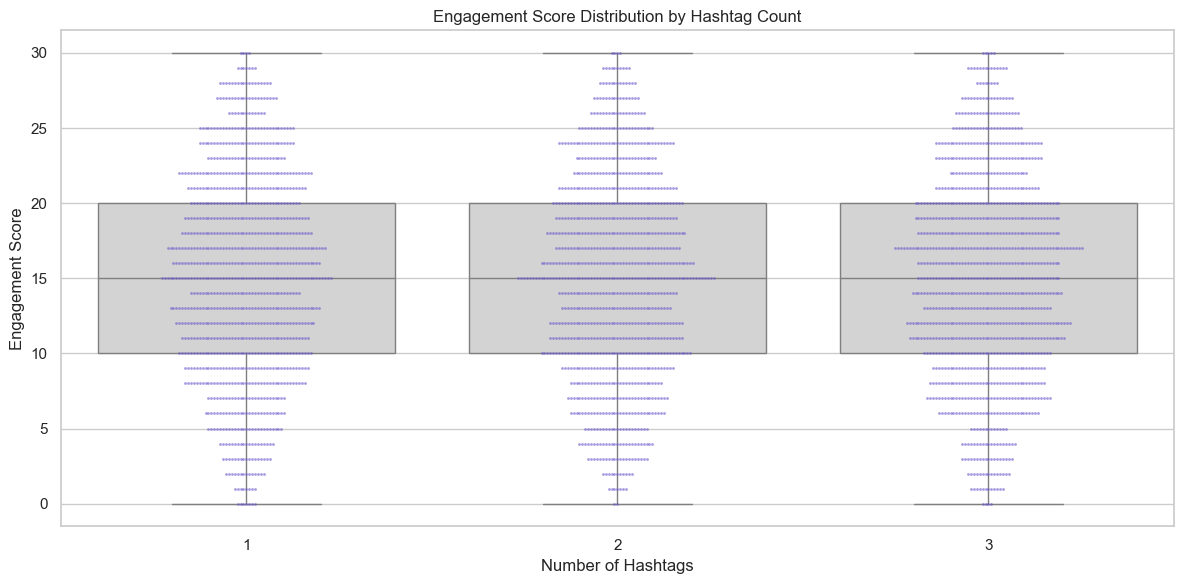

In [154]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.boxplot(data=posts, x="hashtag_count", y="engagement_score", color="lightgray", fliersize=0)

sns.swarmplot(data=posts, x="hashtag_count", y="engagement_score", 
              color="slateblue", alpha=0.6, size=2)

plt.title("Engagement Score Distribution by Hashtag Count")
plt.xlabel("Number of Hashtags")
plt.ylabel("Engagement Score")
plt.tight_layout()
plt.show()


### 🔍 **Q20.** Which users consistently post high-performing content?

In [155]:
user_post_counts = posts.groupby("author_id").size().reset_index(name="post_count")

user_avg_engagement = posts.groupby("author_id")["engagement_score"].mean().reset_index(name="avg_engagement")

quality_creators = user_post_counts.merge(user_avg_engagement, on="author_id")
quality_creators = quality_creators[quality_creators["post_count"] >= 3]  
quality_creators.sort_values("avg_engagement", ascending=False).head(10)

,author_id,post_count,avg_engagement
327,user_417,3,26.666667
555,user_631,3,25.666667
782,user_845,3,25.000000
634,user_708,3,24.666667
264,user_356,3,24.000000
440,user_523,4,23.000000
605,user_680,3,22.666667
410,user_497,5,22.600000
180,user_275,3,22.333333
224,user_319,3,22.333333


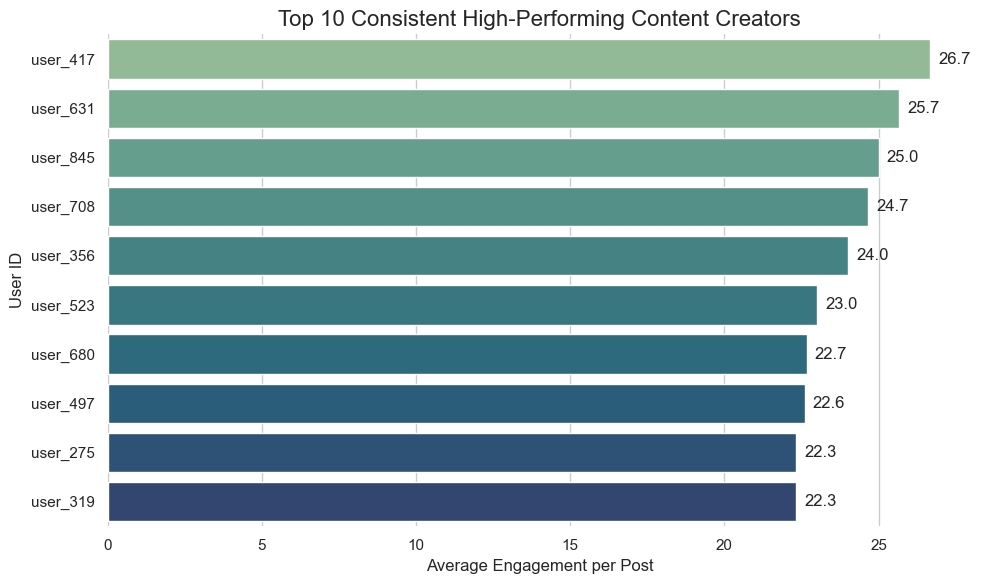

In [156]:
top_creators = (
    quality_creators
    .sort_values("avg_engagement", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top_creators,
    x="avg_engagement",
    y="author_id",
    hue="author_id",
    palette="crest",
    dodge=False,
    legend=False
)

for bar in ax.patches:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(
        width + top_creators["avg_engagement"].max() * 0.01,  # small offset
        y_pos,
        f"{width:.1f}",
        va="center"
    )

ax.set_title("Top 10 Consistent High-Performing Content Creators", fontsize=16)
ax.set_xlabel("Average Engagement per Post", fontsize=12)
ax.set_ylabel("User ID", fontsize=12)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## 📡 Network Graph Analysis

🎯 **Objective:**

- In this section, we’ll visualize the social network of users based on their `follow relationships`.

**By building a directed graph using NetworkX:**

- `Nodes represent users`

- `Directed edges represent a user following another user`

- `Edge direction: A ➝ B means "A follows B"`

**We will:**

- `Build a complete user graph`

- `Visualize a subgraph (e.g. top 50 users)`

- `Analyze basic network properties`

- `Optionally label influencers or highly connected users`

### 🛠 Building the Directed Graph from `users.json`

In [157]:
G = nx.DiGraph()

for user_id in users["id"]:
    G.add_node(user_id)

for _, row in users.iterrows():
    for followed_user in row["following"]:
        if followed_user in users["id"].values:
            G.add_edge(row["id"], followed_user)


### 📏 Network Size and Basic Stats

In [158]:
print("Number of Users (Nodes):", G.number_of_nodes())
print("Number of Follows (Edges):", G.number_of_edges())

density = nx.density(G)
print("Graph Density:", round(density, 4))


Number of Users (Nodes): 1000
Number of Follows (Edges): 17704
Graph Density: 0.0177


### 📊 Visualizing a Subgraph of 50 Users

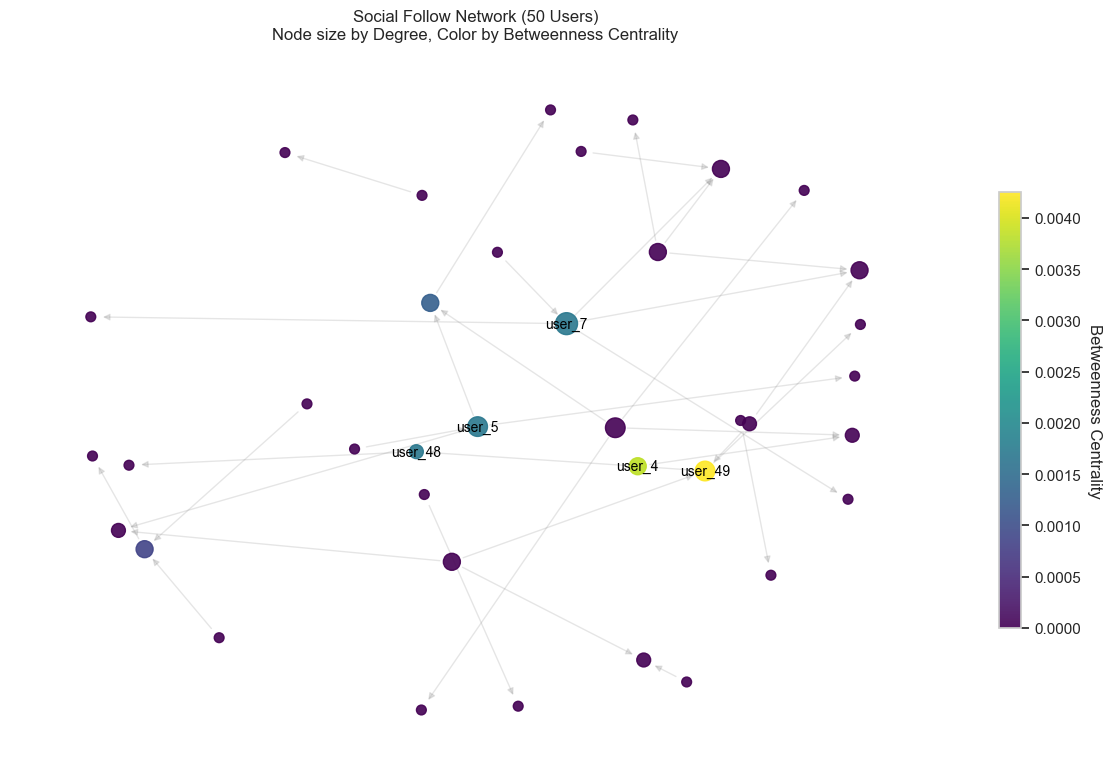

In [159]:
subset_users = list(users["id"][:50])
subgraph = G.subgraph(subset_users)

# compute layout once for consistency
pos = nx.spring_layout(subgraph, seed=42, k=0.5)

# metrics for aesthetics
deg_dict = dict(subgraph.degree())
betw = nx.betweenness_centrality(subgraph)

# node sizes ∝ degree, node colors ∝ betweenness centrality
node_sizes = [deg_dict[n] * 50 for n in subgraph.nodes()]
node_colors = [betw[n] for n in subgraph.nodes()]

plt.figure(figsize=(12, 8))

# draw edges first, lightly
nx.draw_networkx_edges(
    subgraph, pos,
    alpha=0.2,
    edge_color="gray"
)

# draw nodes
nodes = nx.draw_networkx_nodes(
    subgraph, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap="viridis",
    alpha=0.9
)

# annotate only the top 5 central nodes
top5 = sorted(betw, key=betw.get, reverse=True)[:5]
labels = {n: str(n) for n in top5}
nx.draw_networkx_labels(
    subgraph, pos,
    labels,
    font_size=10,
    font_color="black"
)

plt.title("Social Follow Network (50 Users)\nNode size by Degree, Color by Betweenness Centrality")
plt.axis("off")

# add colorbar for centrality scale
cbar = plt.colorbar(nodes, shrink=0.6)
cbar.set_label("Betweenness Centrality", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

### 🌟 Labeling Most Followed Users in the Graph

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_10064\3954341386.py:77: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Github Repository\Real-Time-Social-Media-Feed-with-NoSQL\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


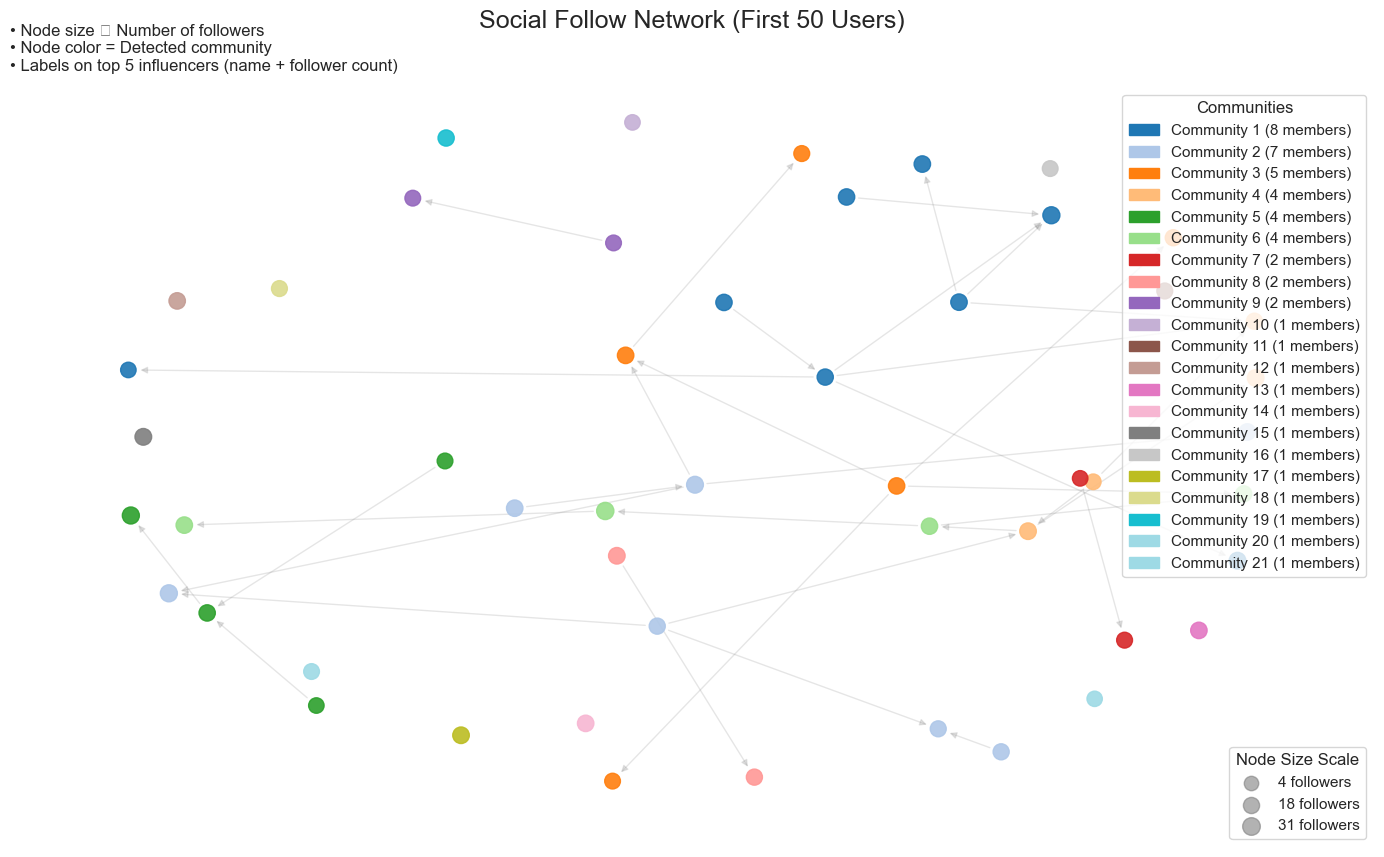

In [160]:
from networkx.algorithms import community
from matplotlib.patches import Patch


subset_ids = list(users["id"][:50])
subG       = G.subgraph(subset_ids)

usernames      = dict(zip(users["id"], users["username"]))
followers_dict = dict(zip(users["id"], users["followers_count"]))

comms   = community.greedy_modularity_communities(subG)
comm_map = {n: i for i, comm in enumerate(comms) for n in comm}

pos = nx.spring_layout(subG, seed=42, k=0.5)

node_sizes  = [followers_dict[n] * 2 + 100 for n in subG.nodes()]
node_colors = [comm_map[n] for n in subG.nodes()]

plt.figure(figsize=(14, 9))

nx.draw_networkx_edges(subG, pos, alpha=0.2, edge_color="gray")

nodes = nx.draw_networkx_nodes(
    subG, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.tab20,
    alpha=0.9
)

top5 = sorted(followers_dict, key=followers_dict.get, reverse=True)[:5]
for nid in top5:
    if nid in pos:
        x, y = pos[nid]
        plt.text(
            x, y + 0.03,
            f"{usernames[nid]}\n({followers_dict[nid]} followers)",
            ha="center",
            fontsize=10,
            fontweight="bold"
        )

legend_comms = [
    Patch(color=plt.cm.tab20(i), label=f"Community {i+1} ({len(comm)} members)")
    for i, comm in enumerate(comms)
]

size_legend = [
    plt.scatter([], [], s=(cnt*2 + 100), color="gray", alpha=0.6, label=f"{cnt} followers")
    for cnt in (int(min(followers_dict.values())), 
                int(np.median(list(followers_dict.values()))), 
                int(max(followers_dict.values())))
]

first_legend = plt.legend(
    handles=legend_comms,
    title="Communities",
    loc="upper right"
)
plt.gca().add_artist(first_legend)

plt.legend(
    handles=size_legend,
    title="Node Size Scale",
    loc="lower right"
)

plt.suptitle("Social Follow Network (First 50 Users)", fontsize=18, y=0.95)
plt.title(
    "• Node size ∝ Number of followers\n"
    "• Node color = Detected community\n"
    "• Labels on top 5 influencers (name + follower count)",
    fontsize=12, loc="left", pad=12
)

plt.axis("off")
plt.tight_layout()
plt.show()


### 📊 Computing Network Centrality Measures

In [161]:
# In-degree centrality: how many follow a user
in_degree = nx.in_degree_centrality(G)

# Out-degree centrality: how many users they follow
out_degree = nx.out_degree_centrality(G)

# Top 5 influential by in-degree
sorted_influencers = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top Influencers by Follower Centrality:")
for uid, score in sorted_influencers:
    uname = users[users["id"] == uid]["username"].values[0]
    print(f"{uname}: {score:.3f}")


Top Influencers by Follower Centrality:
Travon62: 0.031
Georgiana.Predovic66: 0.031
Jermain.Bailey93: 0.029
Kelvin75: 0.029
Noah_Lowe: 0.029


## 🎨 Visual Analytics

🎯 **Objective:**

- This section focuses on creating `insightful`, `polished` visualizations that highlight key trends and patterns in the social media dataset.

**We’ll visualize:**

- `User activity`

- `Posting behavior (time-based)`

- `Hashtag and location trends`

- `Engagement distribution`

- `Influencer impact`

### 📊 Posting Activity by Hour of Day

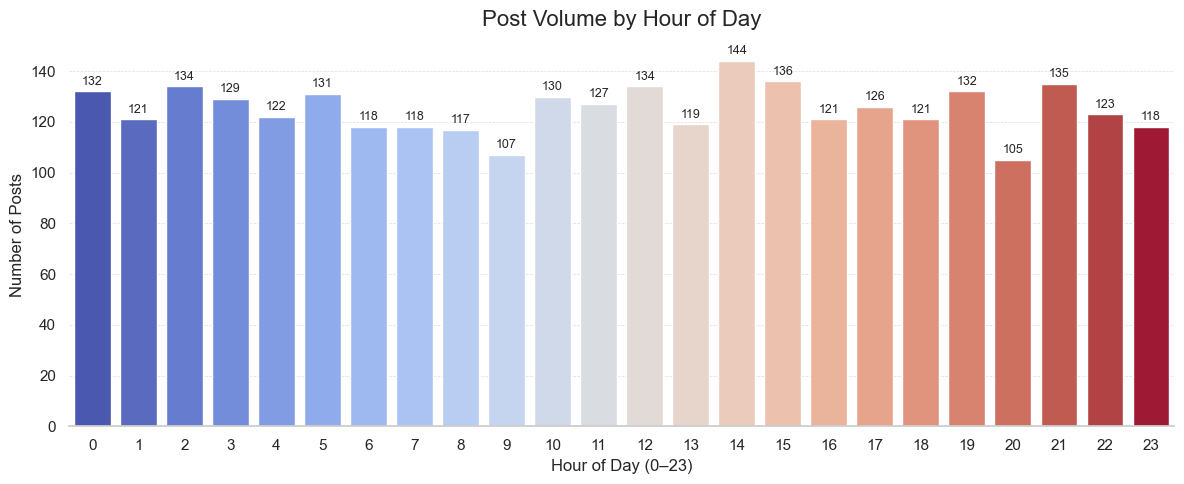

In [162]:
posts["timestamp"] = pd.to_datetime(posts["timestamp"])
posts["post_hour"]  = posts["timestamp"].dt.hour

hourly_counts = (
    posts["post_hour"]
    .value_counts()
    .reindex(range(24), fill_value=0)
    .sort_index()
)

plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=hourly_counts.index,
    y=hourly_counts.values,
    hue=hourly_counts.index,
    palette="coolwarm",
    dodge=False,
    legend=False
)

for i, v in enumerate(hourly_counts.values):
    ax.text(i, v + max(hourly_counts.values)*0.01, str(v),
            ha="center", va="bottom", fontsize=9)

ax.set_title("Post Volume by Hour of Day", fontsize=16, pad=12)
ax.set_xlabel("Hour of Day (0–23)", fontsize=12)
ax.set_ylabel("Number of Posts", fontsize=12)

sns.despine(left=True, bottom=False)
ax.set_xticks(range(0,24,1))
ax.set_xticklabels(range(0,24,1))
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

### 📅 Posting Activity by Day of Week

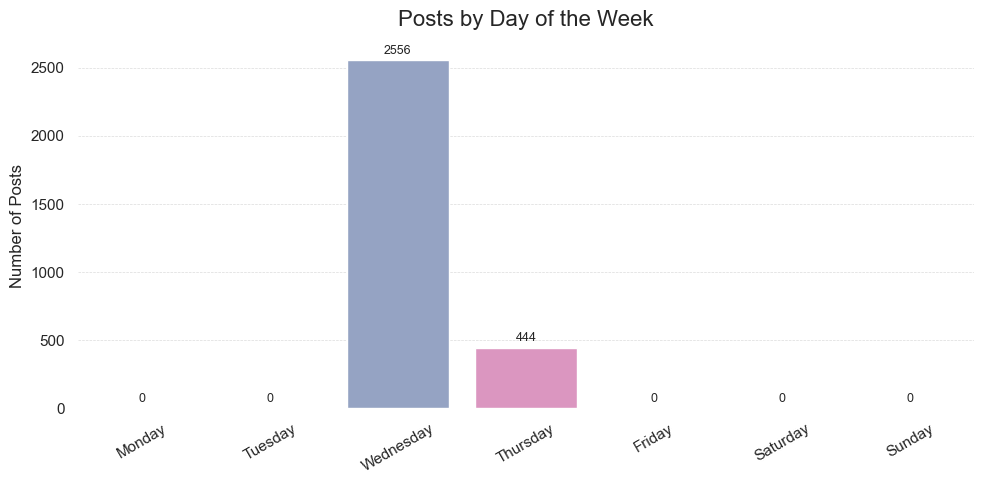

In [163]:
posts["post_day"] = pd.to_datetime(posts["timestamp"]).dt.day_name()
week_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
daily_counts = (
    posts["post_day"]
         .value_counts()
         .reindex(week_order, fill_value=0)
)

df = pd.DataFrame({
    "Day": week_order,
    "Post Count": [daily_counts[d] for d in week_order]
})

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=df,
    x="Day",
    y="Post Count",
    hue="Day",        
    palette="Set2",
    dodge=False,
    legend=False
)

for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + df["Post Count"].max() * 0.01,
        f"{int(h)}",
        ha="center", va="bottom",
        fontsize=9
    )

ax.set_title("Posts by Day of the Week", fontsize=16, pad=12)
ax.set_xlabel("")  
ax.set_ylabel("Number of Posts", fontsize=12)
plt.xticks(rotation=30)

sns.despine(left=True, bottom=True)
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


### 🏷️ Top 10 Hashtags by Frequency

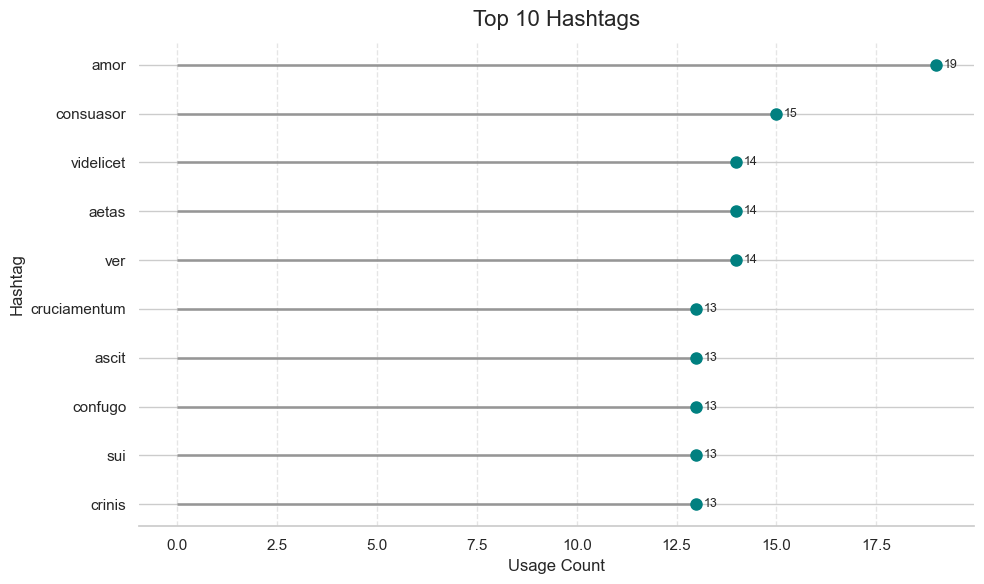

In [164]:
hashtags_flat = posts.explode("hashtags")
top_tags = hashtags_flat["hashtags"].value_counts().head(10)

tags = top_tags.index[::-1]     
counts = top_tags.values[::-1]

fig, ax = plt.subplots(figsize=(10, 6))

ax.hlines(y=tags, xmin=0, xmax=counts, color="gray", alpha=0.7, linewidth=2)

ax.plot(counts, tags, "o", markersize=8, color="teal")

for i, (tag, count) in enumerate(zip(tags, counts)):
    ax.text(count + max(counts) * 0.01, tag, f"{count}", va="center", fontsize=9)

ax.set_title("Top 10 Hashtags", fontsize=16, pad=12)
ax.set_xlabel("Usage Count")
ax.set_ylabel("Hashtag")

ax.xaxis.grid(True, linestyle="--", alpha=0.5)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


### 📍 Top Locations by Post Volume

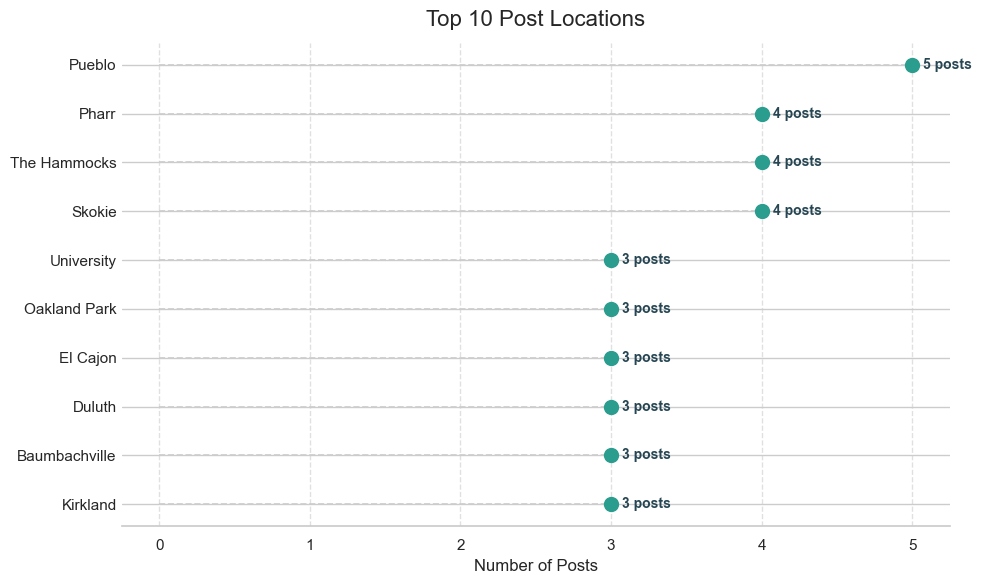

In [165]:
top_locations = posts["location"].value_counts().head(10)
locations = top_locations.index[::-1]  
counts = top_locations.values[::-1]

fig, ax = plt.subplots(figsize=(10, 6))

ax.hlines(y=locations, xmin=0, xmax=counts, color="#CCCCCC", linewidth=1.2, linestyle="--")

ax.plot(counts, locations, "o", markersize=10, color="#2a9d8f")

for loc, count in zip(locations, counts):
    ax.text(count + max(counts)*0.015, loc, f"{count} posts", va="center", fontsize=10, color="#264653", weight="bold")

ax.set_title("Top 10 Post Locations", fontsize=16, pad=12)
ax.set_xlabel("Number of Posts")
ax.set_ylabel("")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.xaxis.grid(True, linestyle="--", alpha=0.6)
ax.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

### 💥 Distribution of Likes and Comments

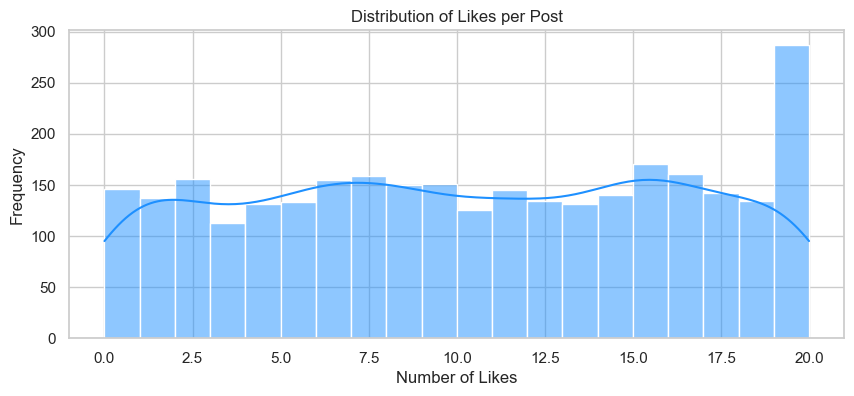

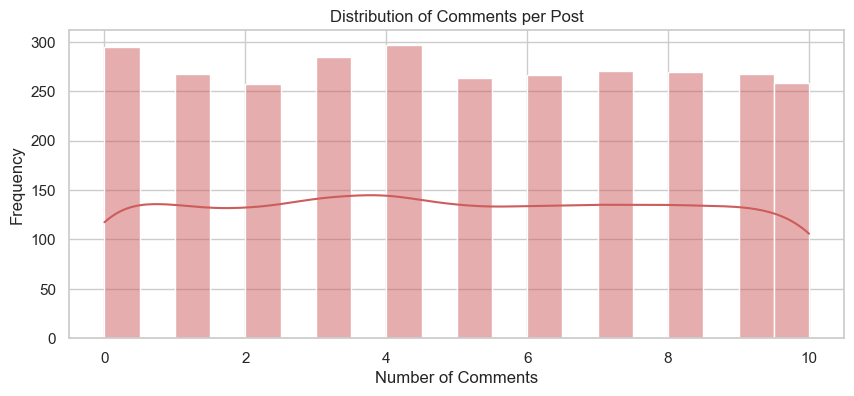

In [166]:
# Likes
plt.figure(figsize=(10, 4))
sns.histplot(posts["num_likes"], bins=20, color="dodgerblue", kde=True)
plt.title("Distribution of Likes per Post")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Comments
plt.figure(figsize=(10, 4))
sns.histplot(posts["num_comments"], bins=20, color="indianred", kde=True)
plt.title("Distribution of Comments per Post")
plt.xlabel("Number of Comments")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### 🌟 Influencer Impact – Followers vs Engagement

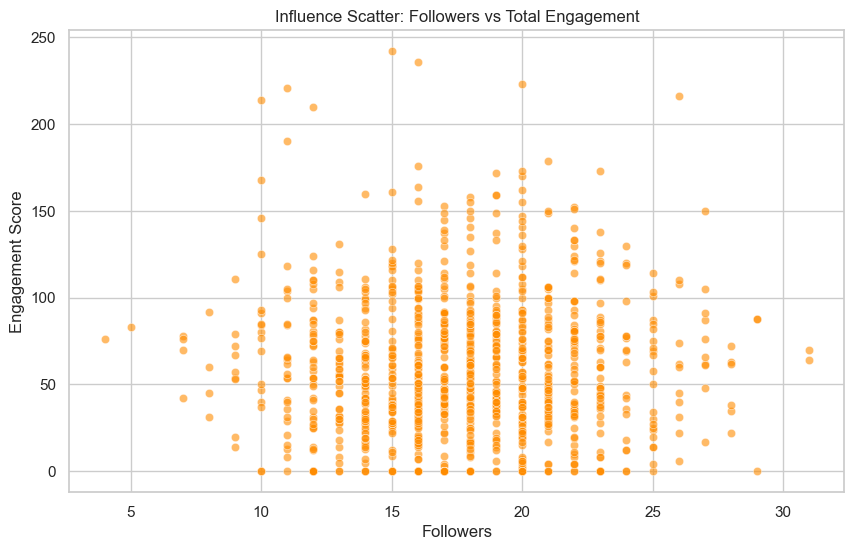

In [167]:
# Assuming merged from earlier: merged["followers_count"], merged["engagement_score"]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x="followers_count", y="engagement_score", alpha=0.6, color="darkorange")
plt.title("Influence Scatter: Followers vs Total Engagement")
plt.xlabel("Followers")
plt.ylabel("Engagement Score")
plt.grid(True)
plt.show()


### 🧠 Correlation Heatmap of Key Metrics

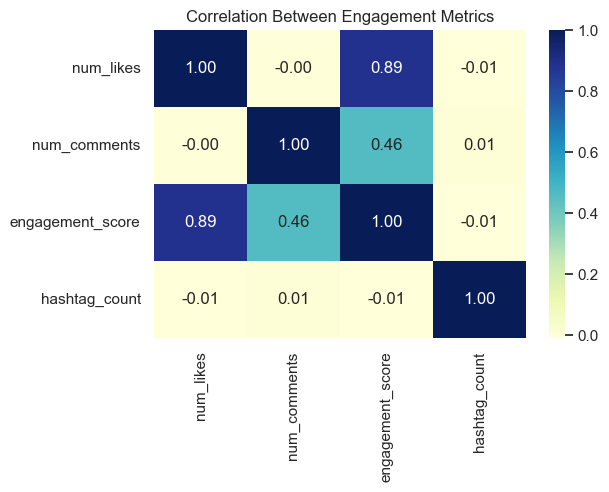

In [168]:
corr_data = posts[["num_likes", "num_comments", "engagement_score", "hashtag_count"]]
corr_matrix = corr_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Engagement Metrics")
plt.show()


### 📐 Likes Distribution by Day of Week

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_10064\3108394982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=posts["post_day"], y=posts["num_likes"], order=[


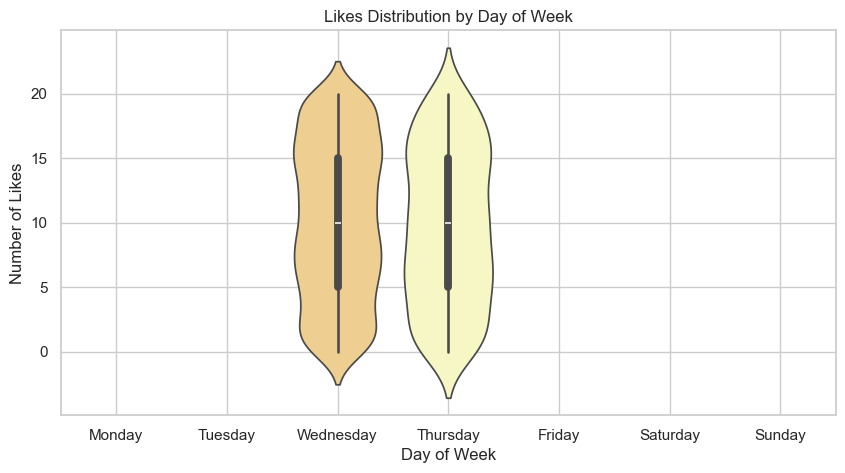

In [169]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=posts["post_day"], y=posts["num_likes"], order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
], palette="Spectral")
plt.title("Likes Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Likes")
plt.grid(True)
plt.show()

### 🌀 Hashtags vs Engagement Score

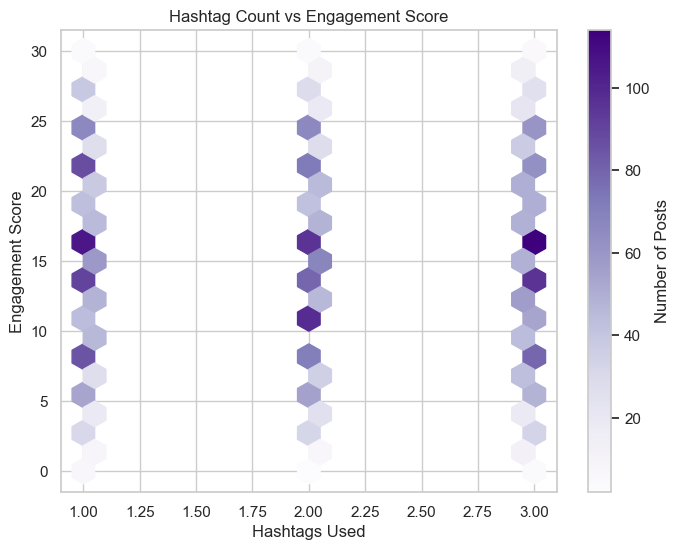

In [170]:
plt.figure(figsize=(8, 6))
plt.hexbin(posts["hashtag_count"], posts["engagement_score"], gridsize=20, cmap="Purples", mincnt=1)
plt.colorbar(label="Number of Posts")
plt.title("Hashtag Count vs Engagement Score")
plt.xlabel("Hashtags Used")
plt.ylabel("Engagement Score")
plt.show()


### 🧭 Post Volume by Hour (Circular Time Distribution)

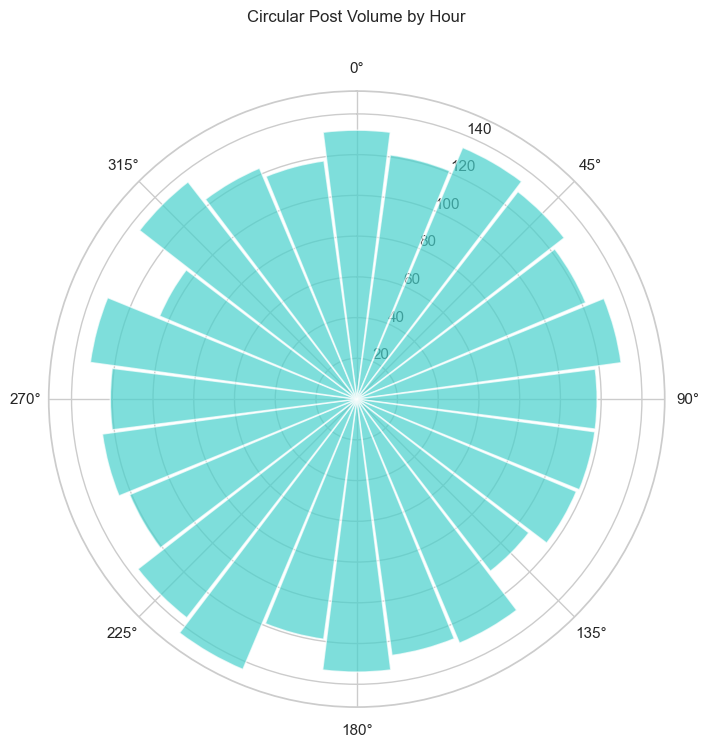

In [171]:
hourly_counts = posts["post_hour"].value_counts().sort_index()
angles = [n / 24 * 2 * 3.14159 for n in hourly_counts.index]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(angles, hourly_counts.values, width=0.25, color="mediumturquoise", alpha=0.7)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.title("Circular Post Volume by Hour", y=1.1)
plt.show()


### 📚 Content Length Style

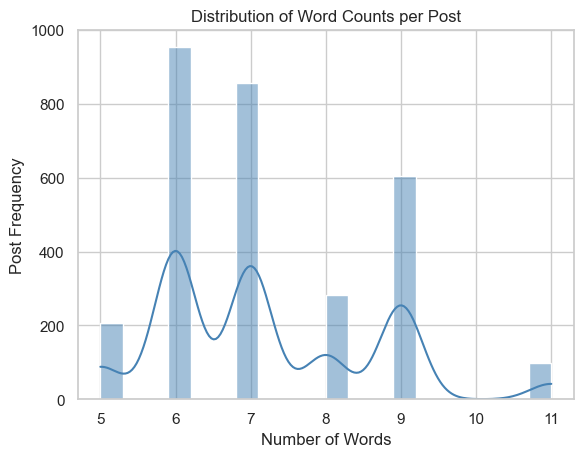

In [172]:
posts["word_count"] = posts["text"].apply(lambda x: len(str(x).split()))
sns.histplot(posts["word_count"], bins=20, kde=True, color="steelblue")
plt.title("Distribution of Word Counts per Post")
plt.xlabel("Number of Words")
plt.ylabel("Post Frequency")
plt.show()


### 🎨 Likes vs Comments per Post (Bubble Plot)

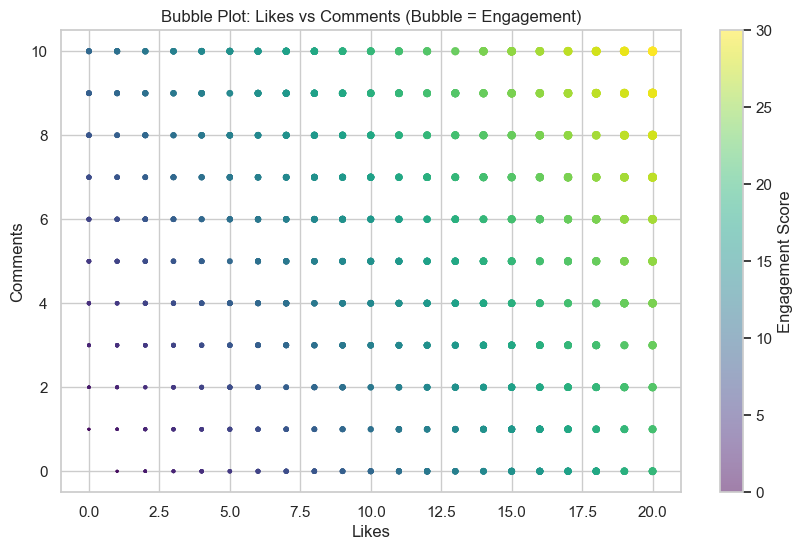

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(
    posts["num_likes"],
    posts["num_comments"],
    s=posts["engagement_score"],
    alpha=0.5,
    c=posts["engagement_score"],
    cmap="viridis"
)
plt.title("Bubble Plot: Likes vs Comments (Bubble = Engagement)")
plt.xlabel("Likes")
plt.ylabel("Comments")
plt.colorbar(label="Engagement Score")
plt.grid(True)
plt.show()


### 🧬 Multivariate Visual Insight of Posts

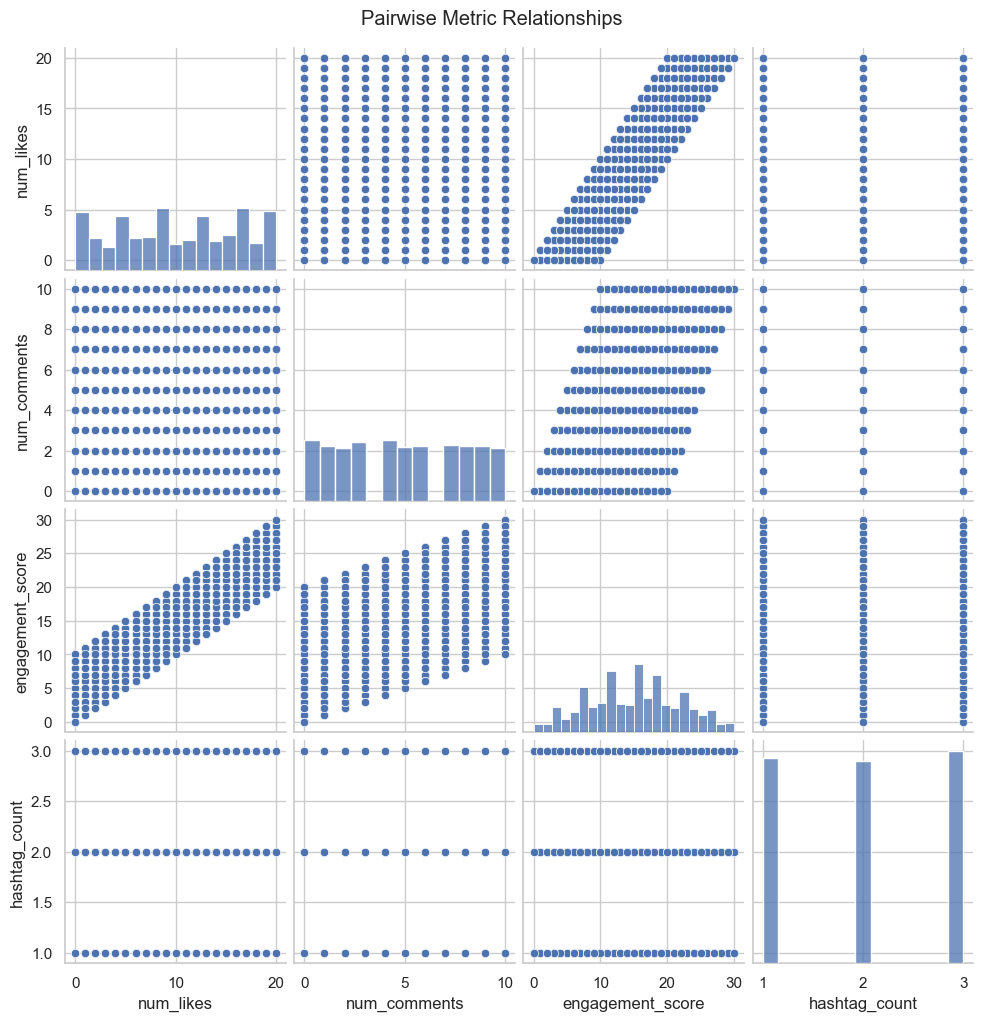

In [174]:
sns.pairplot(posts[["num_likes", "num_comments", "engagement_score", "hashtag_count"]])
plt.suptitle("Pairwise Metric Relationships", y=1.02)
plt.show()


## 🧠 Sentiment Analysis on Comments

🎯 **Objective:**

The goal is to analyze the `emotional tone` of `user comments` on posts by assigning `sentiment polarity scores`. This will helps answer questions like:

- `Are users generally positive, neutral, or negative in their comments?`

- `Which posts receive the most positive or negative comments?`

- `Which users contribute more positive/negative sentiment?`

We'll use `TextBlob`, a lightweight `NLP library`, to evaluate the `sentiment polarity`:

- `-1 = very negative`

- `0 = neutral`

- `+1 = very positive`

### 🧩 Extract Comments from posts.json

In [175]:
from textblob import TextBlob

comment_records = []

for _, post in posts.iterrows():
    for comment in post["comments"]:
        comment_records.append({
            "post_id": post["id"],
            "post_author_id": post["author_id"],
            "comment_user_id": comment["user_id"],
            "comment_text": comment["text"]
        })

comments_df = pd.DataFrame(comment_records)
comments_df.head()


,post_id,post_author_id,comment_user_id,comment_text
0,post_1,user_87,user_217,Too pretty to be real.
1,post_1,user_87,user_606,You’ve got the golden touch!
2,post_1,user_87,user_254,Can't stop looking at this!
3,post_1,user_87,user_977,So peaceful ❤️
4,post_1,user_87,user_587,This is pure art 🔥


### 📉 Calculate Sentiment Polarity for Each Comment

In [182]:
comments_df["sentiment"] = comments_df["comment_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
comments_df["sentiment"].head()

0    0.225000
1    0.375000
2    0.000000
3    0.250000
4    0.214286
Name: sentiment, dtype: float64

### 📊 Visualize Sentiment Distribution

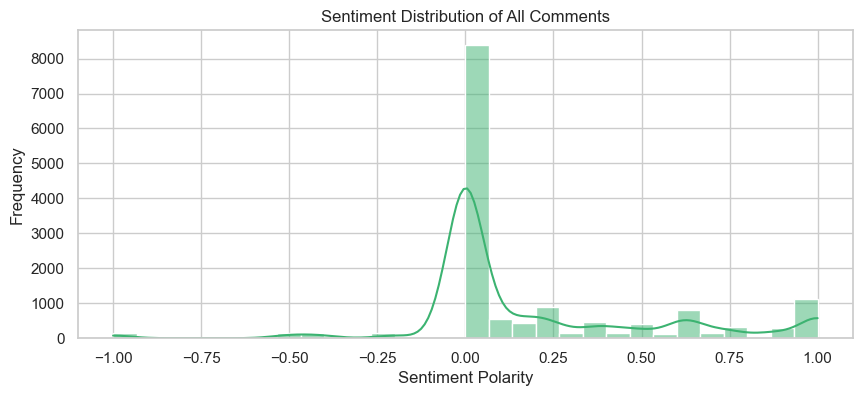

In [177]:
plt.figure(figsize=(10, 4))
sns.histplot(comments_df["sentiment"], bins=30, kde=True, color="mediumseagreen")
plt.title("Sentiment Distribution of All Comments")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### 🧾 Average Sentiment per Post

In [178]:
avg_sentiment_per_post = comments_df.groupby("post_id")["sentiment"].mean().reset_index()
avg_sentiment_per_post.columns = ["post_id", "avg_sentiment"]
avg_sentiment_per_post.head()


,post_id,avg_sentiment
0,post_1,0.384184
1,post_10,1.000000
2,post_100,0.000000
3,post_1000,0.000000
4,post_1002,0.001852


In [179]:
posts_with_sentiment = posts.merge(
    avg_sentiment_per_post, 
    left_on="id", 
    right_on="post_id", 
    how="left"
)

posts_with_sentiment["avg_sentiment"] = posts_with_sentiment["avg_sentiment"].fillna(0)

posts_with_sentiment.head(5)


,id,author_id,text,media_url,hashtags,location,likes,comments,timestamp,num_likes,num_comments,engagement_score,post_hour,post_day,text_length,hashtag_count,word_count,post_id,avg_sentiment
0,post_1,user_87,Nothing like fresh air and good company.,https://loremflickr.com/2812/1773?lock=8797535...,"[succedo, accendo]",Toyworth,"[user_786, user_994, user_686, user_601, user_...","[{'user_id': 'user_217', 'text': 'Too pretty t...",2025-05-07 14:48:04.341000+00:00,15,7,22,14,Wednesday,40,2,7,post_1,0.384184
1,post_2,user_116,Nothing like fresh air and good company.,https://loremflickr.com/1604/1497?lock=1094063...,"[stultus, asperiores]",East Barrettworth,[user_896],"[{'user_id': 'user_119', 'text': 'Your aesthet...",2025-05-07 21:43:21.441000+00:00,1,3,4,21,Wednesday,40,2,7,post_2,0.333333
2,post_3,user_524,Sunsets like these remind me to slow down 🌅,https://loremflickr.com/270/44?lock=8938873091...,"[contra, trepide, considero]",Auburn,"[user_893, user_527, user_391, user_918, user_...","[{'user_id': 'user_150', 'text': 'This just ma...",2025-05-07 22:38:02.406000+00:00,5,7,12,22,Wednesday,43,3,9,post_3,0.321429
3,post_4,user_980,New recipe turned out better than expected 👨‍🍳🍝,https://picsum.photos/seed/sdoQlp2wg/2864/1617,[canto],Lake Jeanne,"[user_400, user_959, user_593, user_422, user_...","[{'user_id': 'user_541', 'text': 'Take me ther...",2025-05-07 12:57:12.284000+00:00,13,8,21,12,Wednesday,47,1,8,post_4,0.083594
4,post_5,user_761,Simple moments are the most special.,https://picsum.photos/seed/oCcp4/2210/2847,[nemo],Stokesmouth,"[user_199, user_642, user_184, user_593, user_...","[{'user_id': 'user_17', 'text': 'Pinned to my ...",2025-05-07 12:23:51.352000+00:00,17,10,27,12,Wednesday,36,1,6,post_5,0.089464


### 🧑‍🤝‍🧑 Average Sentiment per Commenter

In [180]:
avg_sentiment_by_user = comments_df.groupby("comment_user_id")["sentiment"].mean().sort_values(ascending=False)
avg_sentiment_by_user.head(10)


comment_user_id
user_513    0.475000
user_580    0.460714
user_526    0.452778
user_901    0.444643
user_322    0.442308
user_783    0.441250
user_447    0.434375
user_993    0.422222
user_702    0.419118
user_653    0.416667
Name: sentiment, dtype: float64

### 🧪 Explore Relationship Between Sentiment and Engagement

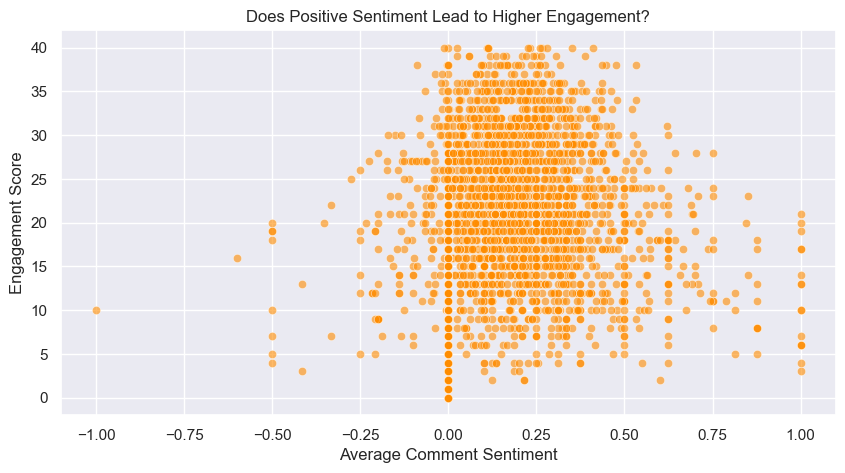

In [181]:
posts_with_sentiment["engagement_score"] = posts_with_sentiment["num_likes"] + 2 * posts_with_sentiment["num_comments"]

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=posts_with_sentiment,
    x="avg_sentiment",
    y="engagement_score",
    alpha=0.6,
    color="darkorange"
)
plt.title("Does Positive Sentiment Lead to Higher Engagement?")
plt.xlabel("Average Comment Sentiment")
plt.ylabel("Engagement Score")
plt.grid(True)
plt.show()
